In [1]:
import iris
import cv2
import matplotlib.pyplot as plt

print(iris.__version__)


subject1_first_image = cv2.imread("./device1/0000/0000_000.bmp", cv2.IMREAD_GRAYSCALE)
subject1_second_image = cv2.imread("./example_orb_image_2.png", cv2.IMREAD_GRAYSCALE)
subject2_image = cv2.imread("./example_orb_image_3.png", cv2.IMREAD_GRAYSCALE)


# plt.imshow(subject1_first_image, cmap='gray')
# plt.title('Subject 1, image 1')
# plt.show()

# plt.imshow(subject1_second_image, cmap='gray')
# plt.title('Subject 1, image 2')
# plt.show()

# plt.imshow(subject2_image, cmap='gray')
# plt.title('Subject 2, image 1')
# plt.show()

import iris

iris_pipeline = iris.IRISPipeline()

output_1 = iris_pipeline(subject1_first_image, eye_side="left")
subject1_first_code = output_1['iris_template']

output_2 = iris_pipeline(subject1_second_image, eye_side="left")
subject1_second_code = output_2['iris_template']

output_3 = iris_pipeline(subject2_image, eye_side="left")
subject2_code = output_3['iris_template']

# print(subject1_first_code)

c:\Users\user\anaconda3\envs\iris_dev\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.8.2


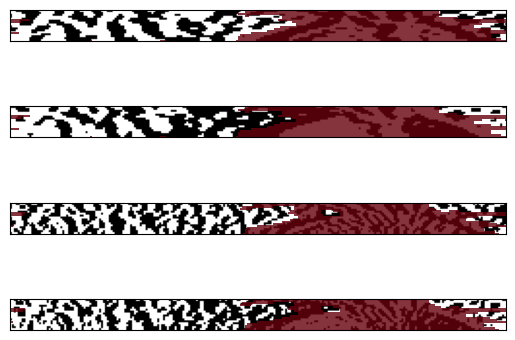

In [2]:
iris_visualizer = iris.visualisation.IRISVisualizer()
canvas = iris_visualizer.plot_iris_template(subject1_first_code)
plt.show()

In [3]:
import numpy as np

iris_ex_array = np.array(subject1_first_code.iris_codes)
iris_ex_mask_array = np.array(subject1_first_code.mask_codes)

In [4]:
print(iris_ex_array.shape)
print(iris_ex_mask_array.shape)

(2, 16, 256, 2)
(2, 16, 256, 2)


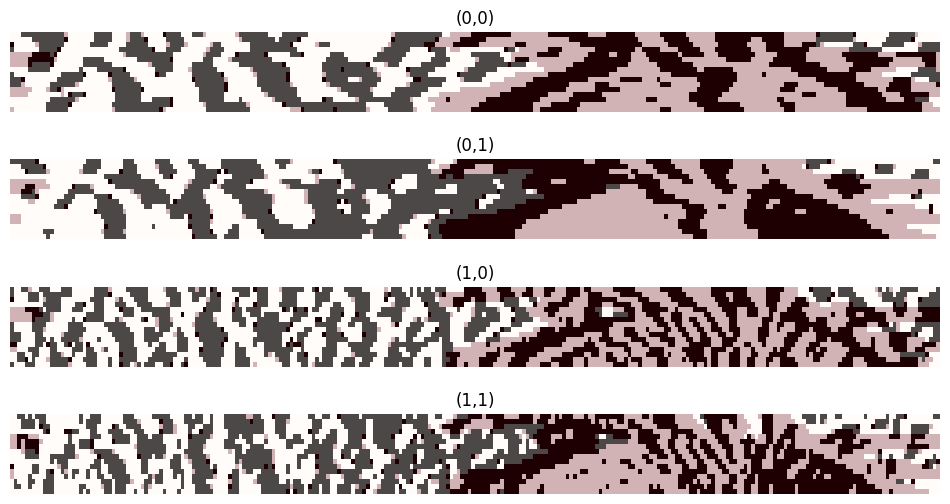

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example input (replace with your actual data)
data = iris_ex_array
mask_arr = iris_ex_mask_array

fig, axes = plt.subplots(4, 1, figsize=(12, 6))

titles = [
    "(0,0)",
    "(0,1)",
    "(1,0)",
    "(1,1)",
]

# Loop through the 4 combinations
for i, (sample_idx, channel_idx) in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
    image = data[sample_idx, :, :, channel_idx]
    mask = mask_arr[sample_idx, :, :, channel_idx]

    axes[i].imshow(image, cmap="gray", aspect="auto")  # Show iris code
    axes[i].imshow(1 - mask, cmap="Reds", alpha=0.3, aspect="auto")  # Show invalid mask overlay in red
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.subplots_adjust(hspace=0.6)
plt.show()


In [58]:
from iris.nodes.matcher.utils import hamming_distance


print(hamming_distance(subject1_first_code, subject1_second_code))
print(hamming_distance(subject1_second_code, subject1_first_code))

Test
(0.22724899947798852, -5)
Test
(0.22724899947798852, 5)
